<a href="https://colab.research.google.com/github/gmauricio-toledo/MetodosNumericos/blob/main/Tarea2-SOL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import fabs

Función para graficar y para el error relativo

In [ ]:
def graficar(f,a,b,num=100):
    eje_x = np.linspace(start=a,
                    stop=b,
                    num=num)
    eje_y = [f(x) for x in eje_x]  # Listas de compresión
    plt.figure(figsize=(7,5))
    plt.plot(eje_x,eje_y,color='red')
    plt.axhline(0,color='gray') # Dibujar eje X
    plt.show()

def error_relativo(x_real,x_aprox):
    return fabs(x_real-x_aprox)/fabs(x_real)

Método de la bisección. El método está implementado como una función que regresa un diccionario con la raiz encontrada, el error final y el número de interaciones necesarias para obtener la raiz deseada.

In [ ]:
def biseccion(f,xl,xu,tol):
    x_m = xl
    error = 2*tol
    n_iteraciones = 0
    while (error>tol):
        n_iteraciones += 1
        x_m_old = x_m
        x_m = (xl+xu)/2
        if x_m != 0:
            error = error_relativo(x_m,x_m_old)
        test = f(xl)*f(x_m)
        if test<0:
            xu = x_m
        elif test>0:
            xl = x_m
        else:
            error = 0
    return {'raiz': x_m,
            'error': error,
            'iteraciones': n_iteraciones
            }

Método de la falsa posición. El método está implementado como una función que regresa un diccionario con la raiz encontrada, el error final y el número de interaciones necesarias para obtener la raiz deseada.

In [ ]:
def falsa_posicion(f,xl,xu,tol):
    x_m = xl
    error = 2*tol
    n_iteraciones = 0
    while (error>tol):
        n_iteraciones += 1
        x_m_old = x_m
        x_m = xu - (f(xu)*(xl-xu))/(f(xl)-f(xu))
        if x_m != 0:
            error = error_relativo(x_m,x_m_old)
        test = f(xl)*f(x_m)
        if test<0:
            xu = x_m
        elif test>0:
            xl = x_m
        else:
            error = 0
    return {'raiz': x_m,
            'error': error,
            'iteraciones': n_iteraciones
            }

# Ejercicio 1

Primero, convertir el problema en un problema de encontrar la raiz de una ecuación:

$$x^3-9x^2+26x-23.8=0 $$

y entonces, la función que usaremos es

$$f(x)=x^3-9x^2+26x-23.8$$

In [ ]:
def f(x):
    y = x**3 - 9*x**2 + 26*x - 23.8
    return y

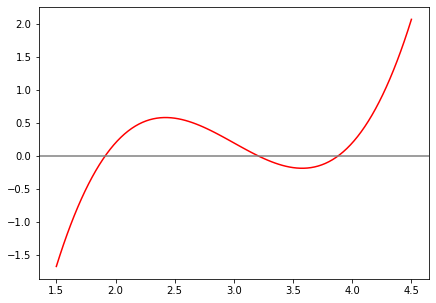

In [ ]:
graficar(f,1.5,4.5)

Usando el método de la bisección

In [ ]:
x_0 = 0
x_1 = 2
tolerancia = 0.000001

resultado = biseccion(f,0,2,tolerancia)

raiz = resultado['raiz']
error = resultado['error']
iteraciones = resultado['iteraciones']

print(f"Solución aproximada: {raiz}")
print(f"Error relativo aproximado: {error}")
print(f"Evaluación: {f(raiz)}")
print(f"Número de iteraciones necesarias: {iteraciones}")

Solución aproximada: 1.911966323852539
Error relativo aproximado: 9.975848470852066e-07
Evaluación: 6.086332753341139e-07
Número de iteraciones necesarias: 20


Usando el método de la falsa posición

In [ ]:
x_0 = 0
x_1 = 2
tolerancia = 0.000001

resultado = falsa_posicion(f,0,2,tolerancia)

raiz = resultado['raiz']
error = resultado['error']
iteraciones = resultado['iteraciones']

print(f"Solución aproximada: {raiz}")
print(f"Error relativo aproximado: {error}")
print(f"Evaluación: {f(raiz)}")
print(f"Número de iteraciones necesarias: {iteraciones}")

Solución aproximada: 1.9119724533086446
Error relativo aproximado: 8.586677232438753e-07
Evaluación: 1.624752270501517e-05
Número de iteraciones necesarias: 42


# Ejercicio 2

Primero, convertir el problema en un problema de encontrar la raiz de una ecuación:

$$v - \sqrt{2gH}\tanh\left(\frac{\sqrt{2gH}}{2L}t\right)=0 $$

y entonces, la función que usaremos es

$$f(H)=v - \sqrt{2gH}\tanh\left(\frac{\sqrt{2gH}}{2L}t\right)$$

con $v=5 m/s$, $t=2.5s$, $L=4m$ y $g=9.81 m/s^2$.

In [ ]:
from math import tanh, sqrt

v = 5
L = 4
g = 9.81
t = 2.5

def f(H):
    return v-sqrt(2*g*H)*tanh((sqrt(2*g*H)*t)/(2*L))

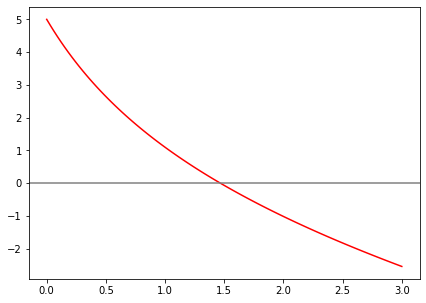

In [ ]:
graficar(f,0,3)

Usando el método de la bisección

In [ ]:
x_0 = 0
x_1 = 2
tolerancia = 1e-7

resultado = biseccion(f,0,2,tolerancia)

raiz = resultado['raiz']
error = resultado['error']
iteraciones = resultado['iteraciones']

print(f"Solución aproximada: {raiz}")
print(f"Error relativo aproximado: {error}")
print(f"Evaluación: {f(raiz)}")
print(f"Número de iteraciones necesarias: {iteraciones}")

Solución aproximada: 1.4658945798873901
Error relativo aproximado: 8.132187074457899e-08
Evaluación: 1.809196170654559e-08
Número de iteraciones necesarias: 24


In [ ]:
x_0 = 0
x_1 = 2
tolerancia = 1e-7

resultado = falsa_posicion(f,0,2,tolerancia)

raiz = resultado['raiz']
error = resultado['error']
iteraciones = resultado['iteraciones']

print(f"Solución aproximada: {raiz}")
print(f"Error relativo aproximado: {error}")
print(f"Evaluación: {f(raiz)}")
print(f"Número de iteraciones necesarias: {iteraciones}")

Solución aproximada: 1.465894628371328
Error relativo aproximado: 4.394051880646743e-08
Evaluación: -8.403039419846436e-08
Número de iteraciones necesarias: 17


Fue más rápido el método de la falsa posición ya que sólo necesito 17 iteraciones contra 24 que necesito el método de la bisección